# EDA

In [188]:
import pandas as pd 

In [189]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
training=pd.read_csv('training.csv')

In [190]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,'#SecKerry: The value of the @StateDept and @U...
1,304834304222064640,Politics,'@rraina1481 I fear so'
2,303568995880144898,Sports,'Watch video highlights of the #wwc13 final be...
3,304366580664528896,Sports,'RT @chelscanlan: At Nitro Circus at #AlbertPa...
4,296770931098009601,Sports,'@cricketfox Always a good thing. Thanks for t...


In [191]:
train.isnull().sum()

TweetId      0
Label        0
TweetText    0
dtype: int64

In [192]:
test.isnull().sum()

TweetId      0
TweetText    0
dtype: int64

In [193]:
train['Label'].value_counts()

Sports      3325
Politics    3200
Name: Label, dtype: int64

<Axes: xlabel='Label', ylabel='count'>

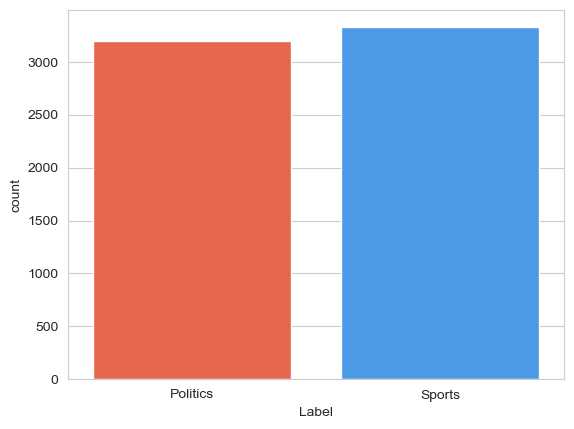

In [194]:
sns.countplot(x="Label",data =train, palette=["#FF5733", "#3399FF", "#33FF7A"])

In [195]:
train.shape

(6525, 3)

In [196]:
def clean_column(train):
    train['TweetText'] = train['TweetText'].str.replace('.', '') # remove . from string in list of strings in train 
    train['TweetText'] = train['TweetText'].str.replace('!', '')
    train['TweetText'] = train['TweetText'].str.replace('?', '')
    train['TweetText'] = train['TweetText'].str.replace('(', '')
    train['TweetText'] = train['TweetText'].str.replace(')', '')
    train['TweetText'] = train['TweetText'].str.replace('-', '')
clean_column(train)

/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_2388/2622648598.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['TweetText'] = train['TweetText'].str.replace('.', '') # remove . from string in list of strings in train
/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_2388/2622648598.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  train['TweetText'] = train['TweetText'].str.replace('?', '')
/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_2388/2622648598.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal

In [197]:
# Cleaning the tweets 
import re
def cleanTxt(text):
    text=re.sub('@[A-Za-z0–9]+','',text) #Removing @mentions
    text=re.sub('#', '', text) # Removing '#' hash tag
    text=re.sub('RT[\s]+', '', text) # Removing RT
    text=re.sub('https?:\/\/\S+', '', text) # Removing hyperlink
    text=re.sub(':', '', text)
    text=re.sub("'", '', text)
    text=re.sub(",", '', text)
    text=re.sub(";", '', text)
    text=re.sub("&", '', text)
    text=re.sub("``", '', text)
    text=re.sub('"', '', text)
    return text
train['TweetText']=train['TweetText'].apply(cleanTxt)

In [198]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,SecKerry The value of the and is measured no...
1,304834304222064640,Politics,1481 I fear so
2,303568995880144898,Sports,Watch video highlights of the wwc13 final betw...
3,304366580664528896,Sports,At Nitro Circus at AlbertPark theymakeitlook...
4,296770931098009601,Sports,Always a good thing Thanks for the feedback


In [199]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/aithassouneyouness/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [200]:
#tokenization
train['TweetText'] = train['TweetText'].apply(nltk.word_tokenize)

In [201]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[SecKerry, The, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, I, fear, so]"
2,303568995880144898,Sports,"[Watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[At, Nitro, Circus, at, AlbertPark, theymakeit..."
4,296770931098009601,Sports,"[Always, a, good, thing, Thanks, for, the, fee..."


In [202]:
"""def tolist(x):
    return x.split(' ')
train['TweetText']=train['TweetText'].apply(tolist)
train['TweetText'].astype(str)"""

"def tolist(x):\n    return x.split(' ')\ntrain['TweetText']=train['TweetText'].apply(tolist)\ntrain['TweetText'].astype(str)"

In [203]:
#remove null strings 
def remove_empty(x):
    return [item for item in x if item != '']
train['TweetText']=train['TweetText'].apply(remove_empty)



In [204]:
train.head()

,TweetId,Label,TweetText
0,304271250237304833,Politics,"[SecKerry, The, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, I, fear, so]"
2,303568995880144898,Sports,"[Watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[At, Nitro, Circus, at, AlbertPark, theymakeit..."
4,296770931098009601,Sports,"[Always, a, good, thing, Thanks, for, the, fee..."


In [205]:
# lowercase all words in train
def lower_case(data):
    for i in range(data.shape[0]) :
        data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]
    return data
lower_case(train)

/var/folders/jg/pktw8l5s32xgj2428mt_gdxr0000gn/T/ipykernel_2388/1933219485.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TweetText'][i] = [x.lower() for x in data['TweetText'][i]]


,TweetId,Label,TweetText
0,304271250237304833,Politics,"[seckerry, the, value, of, the, and, is, measu..."
1,304834304222064640,Politics,"[1481, i, fear, so]"
2,303568995880144898,Sports,"[watch, video, highlights, of, the, wwc13, fin..."
3,304366580664528896,Sports,"[at, nitro, circus, at, albertpark, theymakeit..."
4,296770931098009601,Sports,"[always, a, good, thing, thanks, for, the, fee..."
...,...,...,...
6520,296675082267410433,Politics,"[photo, pm, has, laid, a, wreath, at, martyrs,..."
6521,306677536195231746,Sports,"[the, secret, of, the, chennai, pitch, crumbli..."
6522,306451295307431937,Sports,"[he, isnt, on, twitter, either]"
6523,306088574221176832,Sports,"[which, england, player, would, you, take, out..."


In [206]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/aithassouneyouness/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [218]:
# removing stop words and update the weights
stop_words = list(stopwords.words('english'))
def remove_stopwords(data):
    for i in range(data.shape[0]) :
        for word in  stop_words:
            if word in data['TweetText'][i]:
                data['TweetText'][i].remove(word)
    '''stop_words = ['a', 'an', 'the','is', 'and', 'or', 'but','the', 'if', 'then', 'thus','&amp;', 'hence','that','are','i','was','as','pm','am', 'so', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 'can', 'will', 'just', 'don', 'should', 'now','this','to','we','our','have','1st','of','his','has','be','it','you']
   '''
    return data
train = remove_stopwords(train)

In [238]:
nltk.download('wordnet')
nltk.download()

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/aithassouneyouness/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


Exception in thread Thread-6:
Traceback (most recent call last):
  File "/Users/aithassouneyouness/anaconda3/lib/python3.11/threading.py", line 1038, in _bootstrap_inner
    self.run()
  File "/Users/aithassouneyouness/anaconda3/lib/python3.11/site-packages/nltk/downloader.py", line 2104, in run
    for msg in self.data_server.incr_download(self.items):
  File "/Users/aithassouneyouness/anaconda3/lib/python3.11/site-packages/nltk/downloader.py", line 624, in incr_download
    yield from self._download_list(info_or_id, download_dir, force)
  File "/Users/aithassouneyouness/anaconda3/lib/python3.11/site-packages/nltk/downloader.py", line 667, in _download_list
    for msg in self.incr_download(item, download_dir, force):
  File "/Users/aithassouneyouness/anaconda3/lib/python3.11/site-packages/nltk/downloader.py", line 637, in incr_download
    yield from self.incr_download(info.children, download_dir, force)
  File "/Users/aithassouneyouness/anaconda3/lib/python3.11/site-packages/nltk/do

In [ ]:
import nltk
nltk.data.path.append("/Users/aithassouneyouness/nltk_data")

In [ ]:
#lemmatization1
wnl = nltk.WordNetLemmatizer()

def lemmatization(data):
    for i in range(data.shape[0]):
        lemmatized_tweet = []
        for word in data['TweetText'][i]:
            lemmatized_word = wnl.lemmatize(word)
            lemmatized_tweet.append(lemmatized_word)
        data['TweetText'][i] = lemmatized_tweet
    return data
    
train = lemmatization(train)

LookupError: 
**********************************************************************
  Resource [93momw-1.4[0m not found.
  Please use the NLTK Downloader to obtain the resource:

  [31m>>> import nltk
  >>> nltk.download('omw-1.4')
  [0m
  For more information see: https://www.nltk.org/data.html

  Attempted to load [93mcorpora/omw-1.4[0m

  Searched in:
    - '/Users/aithassouneyouness/nltk_data'
    - '/Users/aithassouneyouness/anaconda3/nltk_data'
    - '/Users/aithassouneyouness/anaconda3/share/nltk_data'
    - '/Users/aithassouneyouness/anaconda3/lib/nltk_data'
    - '/usr/share/nltk_data'
    - '/usr/local/share/nltk_data'
    - '/usr/lib/nltk_data'
    - '/usr/local/lib/nltk_data'
**********************************************************************


In [219]:
from collections import Counter
def word_count(data):
    freqs = {}
    for i in range(data.shape[0]) :
        label = data['Label'][i]
        for word in  data['TweetText'][i]:
            pair = ((word,label))
            if pair in freqs :
                freqs[pair] += 1
            else :
                freqs[pair] = 1
    return freqs

In [220]:
word_count(train)
# same function as above but return word its label and count 
df=pd.DataFrame.from_dict(word_count(train), orient='index', columns=['count'])
#create the two columns word , label 
df.reset_index(inplace=True)
df[['word','label']] = pd.DataFrame(df['index'].tolist(), index=df.index)
df.drop(columns=['index'], inplace=True)


In [221]:
#sort by count
df.sort_values(by=['count'], ascending=False, inplace=True)

In [222]:
#reindex
df.reset_index(inplace=True)
df.drop(columns=['index'], inplace=True)
df.head()

,count,word,label
0,422,amp,Politics
1,347,indvaus,Sports
2,329,president,Politics
3,314,test,Sports
4,236,obama,Politics


In [223]:
#create the weights column
df['weights']=df['count']/df.groupby('label')['count'].transform('sum')
df.head()

,count,word,label,weights
0,422,amp,Politics,0.013065
1,347,indvaus,Sports,0.010387
2,329,president,Politics,0.010186
3,314,test,Sports,0.009399
4,236,obama,Politics,0.007307


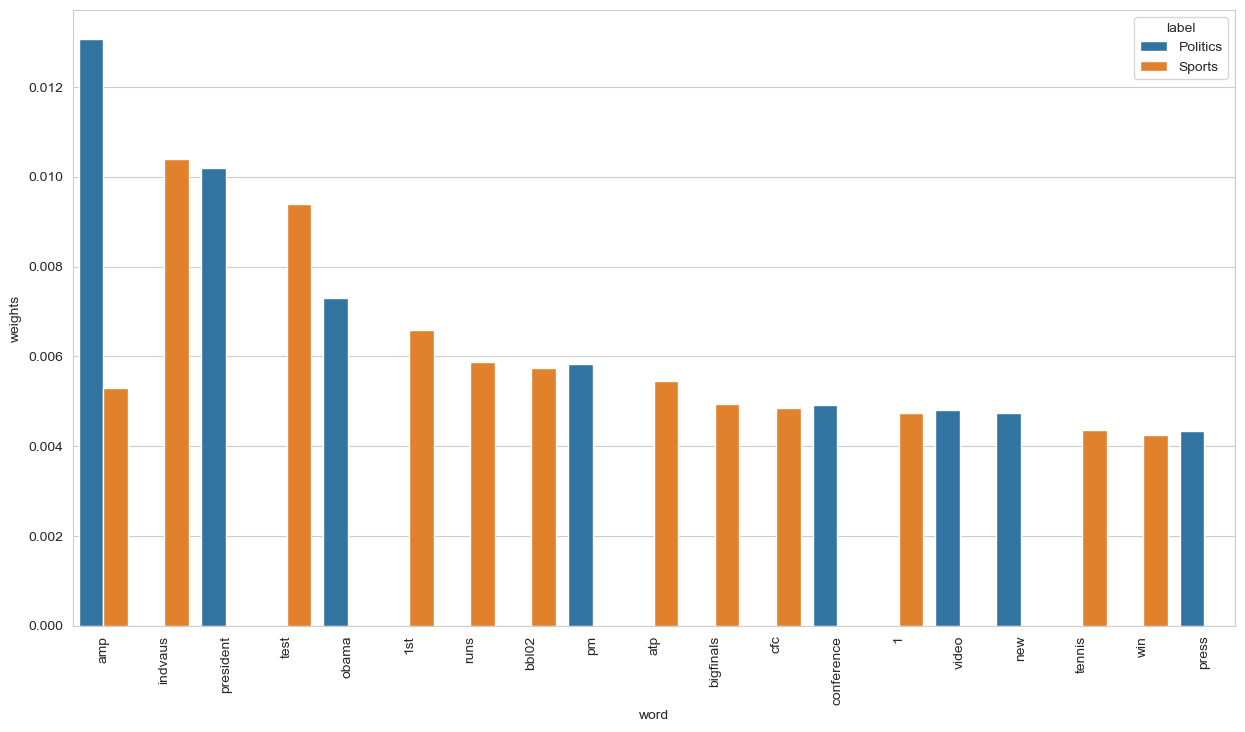

In [224]:
#plot the weights
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.figure(figsize=(15, 8))
sns.barplot(x='word', y='weights', hue='label', data=df.head(20))
plt.xticks(rotation=90)
plt.show()